In [4]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
#creating path for easier import of data
path = r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Python\Instacart Basket Analysis 01-2025'

In [6]:
#importing data 
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data', 'ords_prods_cust_high_activity.pkl'))

In [7]:
#removing column display limit
pd.set_option('display.max_columns', None)

In [8]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,median_days_since_order,customer_frequency,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income,Region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer


# Creating income groups

In [10]:
#checking distribution to create income groups 
df['Income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: Income, dtype: float64

In [11]:
region_medians = df.groupby('Region')['Income'].median()

In [12]:
region_medians

Region
Midwest      97430.0
Northeast    96905.0
South        96195.0
West         96832.0
Name: Income, dtype: float64

In [13]:
#creating income groups
df.loc[df['Income'] <= 67292, 'Income Group'] = 'low income'
df.loc[(df['Income'] > 67292) & (df['Income'] <= 128102), 'Income Group'] = 'middle income'
df.loc[df['Income'] > 128102, 'Income Group'] = 'high income'

In [14]:
#checking values to see if it worked
df['Income Group'].value_counts()

Income Group
middle income    15482125
low income        7741348
high income       7741091
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Income in Customers')

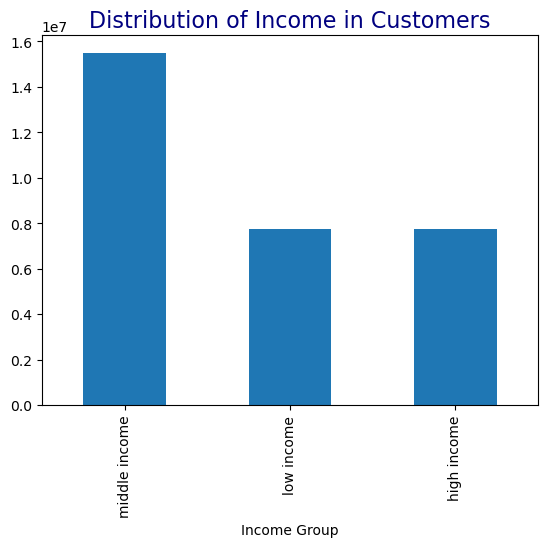

In [15]:
#barchart for distribution of income groups amongst customers
bar_income_dist = df['Income Group'].value_counts().plot.bar()
plt.title('Distribution of Income in Customers', fontsize=16, color='navy', loc='center')

In [16]:
bar_income_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_dist.png'))

In [17]:
#creating age groups 
df.loc[df['Age'] <= 30, 'Age Group'] = 'young adult'
df.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age Group'] = 'adult'
df.loc[(df['Age'] > 40) & (df['Age'] <= 60), 'Age Group'] = 'middle aged'
df.loc[df['Age'] > 60, 'Age Group'] = 'senior'


In [18]:
age_group_counts = df['Age Group'].value_counts()

In [19]:
df['Age Group'].value_counts()

Age Group
senior         10112607
middle aged     9703524
young adult     6304240
adult           4844193
Name: count, dtype: int64

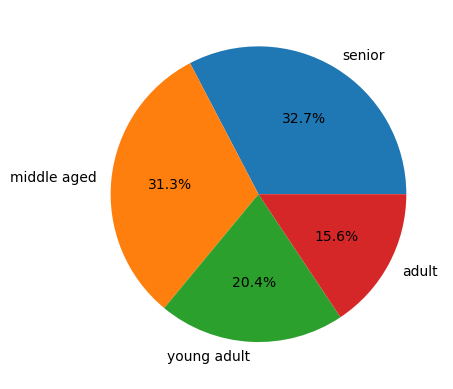

In [20]:
age_pie = plt.pie(age_group_counts,labels=['senior','middle aged','young adult','adult'], autopct='%1.1f%%')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_pie.png'))
plt.show()

In [21]:
df['Number of Dependants'].value_counts()

Number of Dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [22]:
#creating a flag for if they have dependants
df.loc[df['Number of Dependants'] == 0, 'Dependant Status'] = 'No'
df.loc[df['Number of Dependants'] >= 1, 'Dependant Status'] = 'Yes'

In [23]:
dependant_dist = df['Dependant Status'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

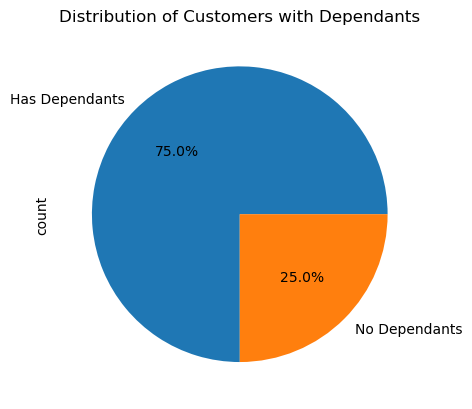

In [24]:
dependant_pie = dependant_dist.plot.pie(labels = ['Has Dependants','No Dependants'], autopct='%1.1f%%')
plt.title('Distribution of Customers with Dependants')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_dist_pie.png'))
plt.show

In [25]:
spendertype_incomegroup_cross = pd.crosstab(df['spender_type'],df['Income Group'], dropna=False)

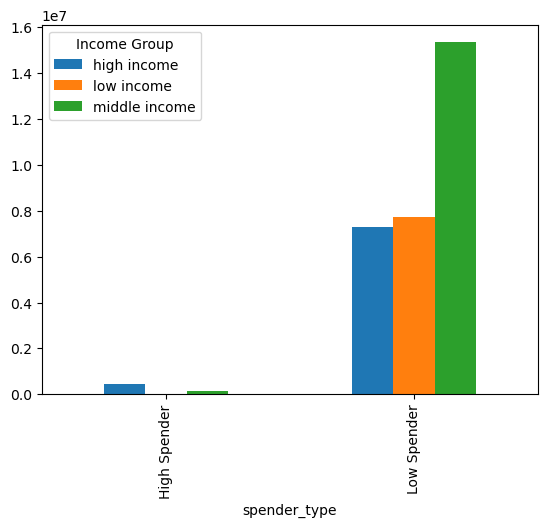

In [26]:
spender_income_bar = spendertype_incomegroup_cross.plot.bar()
spender_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spender_income_bar.png'))

In [27]:
loyalty_age_cross = pd.crosstab(df['loyalty_flag'],df['Income Group'], dropna=False)

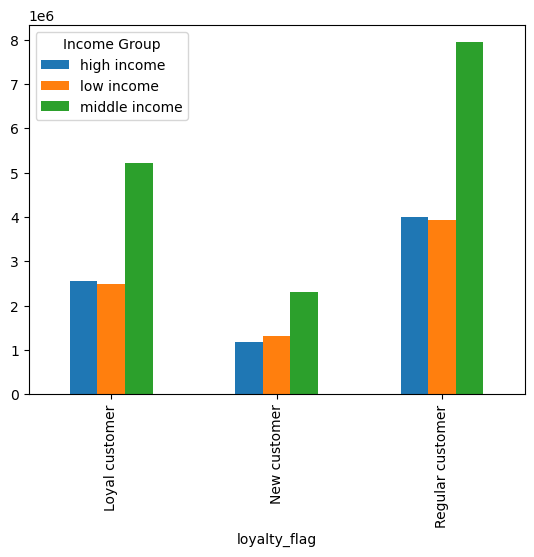

In [82]:
loyalty_age_bar = loyalty_age_cross.plot.bar()
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_bar.png'))

# Researching spending and customer groups by department 

In [30]:
#importing dept data
df_dept = pd.read_csv(os.path.join(path, '02 Data' , 'Prepared Data', 'departments_wrangled.csv'))

In [31]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [32]:
df_dept = df_dept.rename(columns={'Unnamed: 0': 'department_id'})

In [33]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [34]:
df_all_merge = df.merge(df_dept, on='department_id', how = 'inner',  indicator = True)

In [35]:
df_all_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,median_days_since_order,customer_frequency,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income,Region,activity_flag,Income Group,Age Group,Dependant Status,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,low income,adult,Yes,beverages,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,low income,adult,Yes,dairy eggs,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,low income,adult,Yes,snacks,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,low income,adult,Yes,snacks,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,low income,adult,Yes,household,both


In [36]:
#exporting as pickle file
df_all_merge.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'orders_products_cust_dept_final.pkl'))

In [37]:
df_all_merge['_merge'].describe()

count     30964564
unique           1
top           both
freq      30964564
Name: _merge, dtype: object

# Region and Age Group compared to Dept 

In [105]:
dept_age_cross = pd.crosstab(df_all_merge['department'],df_all_merge['Age Group'], dropna=False)

In [107]:
dept_age_cross

Age Group,adult,middle aged,senior,young adult
department,,,,
alcohol,23376,45188,45628,30435
babies,63594,129709,133019,84070
bakery,174903,352313,366017,227595
beverages,396168,811805,844687,519241
breakfast,104399,211277,217539,137635
bulk,5143,10419,10929,6960
canned goods,157578,316767,329485,208244
dairy eggs,816071,1616891,1687944,1056276
deli,157619,313495,328967,203753


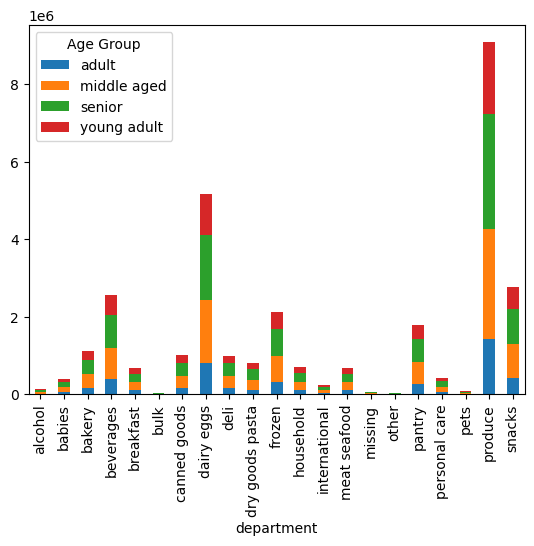

In [109]:
dept_age_bar = dept_age_cross.plot.bar(stacked = True)
dept_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_age_bar.png'))

#produce and dairy/egg are their top 2 dept followed by snacks and beverages

In [42]:
dept_region_cross = pd.crosstab(df_all_merge['department'],df['Region'], dropna=False)

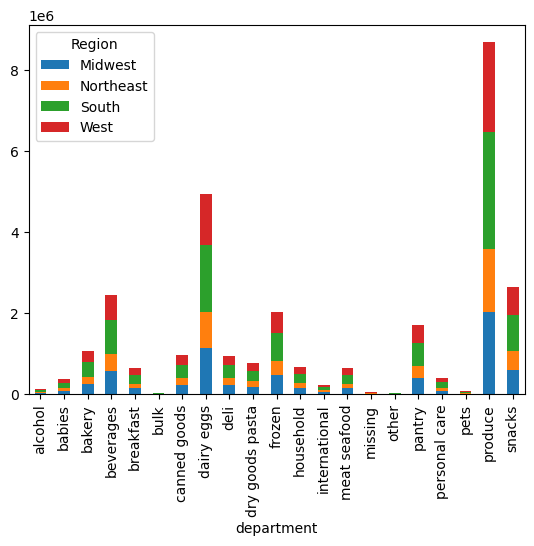

In [111]:
dept_region_bar = dept_region_cross.plot.bar(stacked = True)
dept_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_region_bar.png'))

In [44]:
dept_age_cross = pd.crosstab(df_all_merge['Age Group'],df_all_merge['department'],dropna = False)

Text(0.5, 1.0, 'Customer Dept Preferences by Age Group')

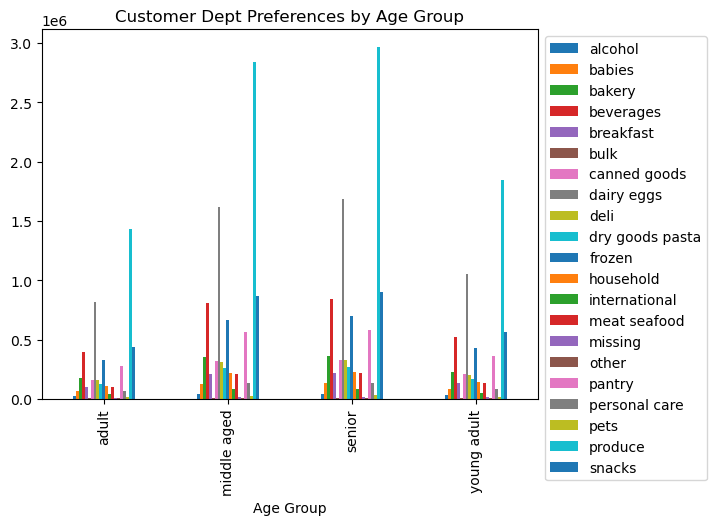

In [45]:
dept_age_bar = dept_age_cross.plot.bar()
dept_age_bar.legend(bbox_to_anchor=(1,1))
plt.title('Customer Dept Preferences by Age Group')

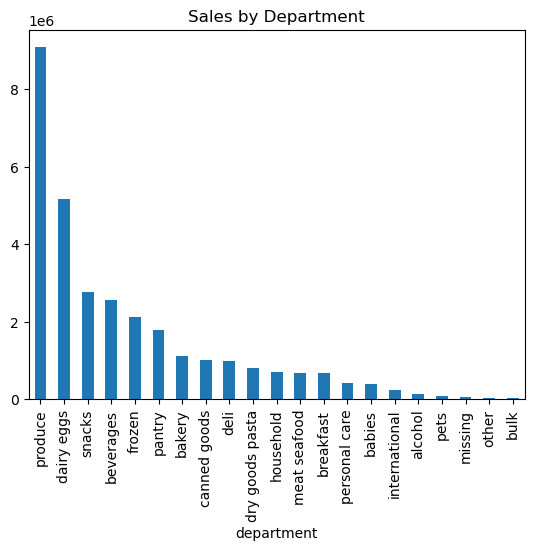

In [119]:
dept_sales_bar = df_all_merge['department'].value_counts().plot.bar()
plt.title('Sales by Department')
plt.show
dept_sales_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_sales_bar.png'))

# Busiest Days and Busiest Hours charts remade with only high activity customer

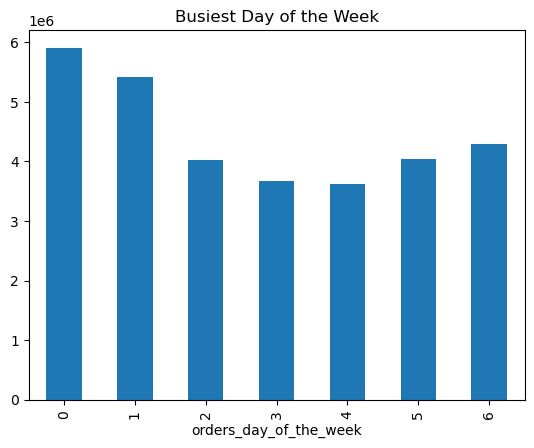

In [121]:
busy_dow_bar = df_all_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()
plt.title('Busiest Day of the Week')
busy_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busy_dow_bar.png'))

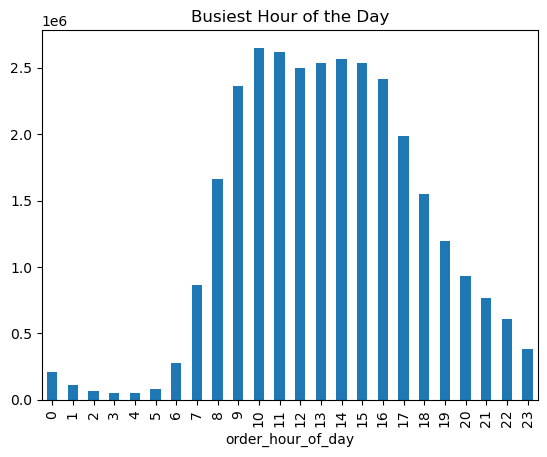

In [123]:
busy_hod_bar = df_all_merge['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Busiest Hour of the Day')
busy_hod_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busy_hod_bar.png'))